In [5]:
import joblib
from interpret.glassbox._ebm._utils import convert_to_intervals
from dotenv import load_dotenv
from scipy.interpolate import interp1d
import dashboard_helpers
import loading_helpers
import simplify_graph
import matplotlib.pyplot as plt
from interpret import show
load_dotenv()

%matplotlib inline

ebm, ebm_data = dashboard_helpers.load_ebm_data("ebm-heloc.pkl")

In [17]:
x_vals = loading_helpers.get_x_vals(ebm, 1)
y_vals = ebm.term_scores_[1][1:-1]
print(f"original x: {len(x_vals)}")
print(f"original y: {len(y_vals)}")

original x: 464
original y: 464


In [16]:
simple_x, simple_y = simplify_graph.simplify_point_graph(x_vals, y_vals)
print(f"simple x: {len(simple_x)}")
print(f"simple y: {len(simple_y)}")

simple x: 91
simple y: 91


In [15]:
from scipy.interpolate import interp1d

def interpolate_scores(x_simple, y_simple, x_complex)
    interp_func = interp1d(x_simple, y_simple, kind='linear', fill_value="extrapolate")
    y_complex = interp_func(x_complex)
    return y_complex

464


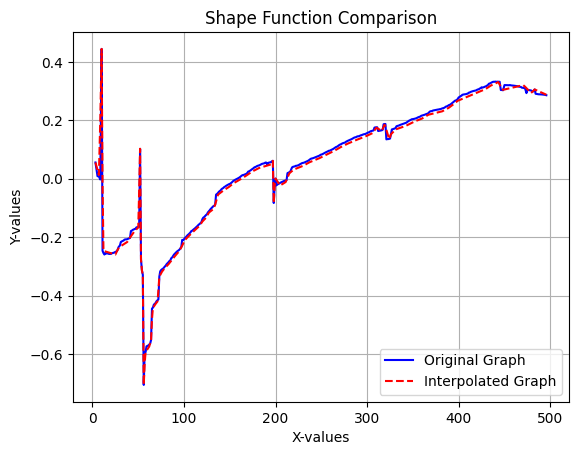

In [18]:
plt.plot(x_vals, y_vals, label='Original Graph', linestyle='-', color='blue')
plt.plot(x_vals, y_complex, label='Interpolated Graph', linestyle='--', color='red')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Shape Function Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
new_ebm = ebm.copy()
new_ebm.term_scores_[1][1:-1] = y_complex
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/140641376390016/ -->